In [1]:
# Import các thư viện đầu vào
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Thêm Dataset vào bảng df
df = pd.read_csv('combined_data.csv', encoding='latin-1')

In [3]:
# Tạo ra 2 cột tương ứng
df.columns = ['spam', 'message']

In [4]:
# Kiểm tra giá trị null
df.isnull().sum()

spam       0
message    0
dtype: int64

In [5]:
# Đếm số lượng tin nhắn spam và ham tương ứng với nhãn 1 và 0
df['spam'].value_counts()

spam
1    43910
0    39538
Name: count, dtype: int64

In [6]:
# Đưa tất cả chữ về viết thường
df['message'] = df['message'].str.lower()   

In [7]:
# Kết hợp các đại lượng apply, len và regex để trích xuất số lượng từ và ký tự trong văn bản
df['word_count'] = df['message'].str.split(' ').apply(len)
df['letter_count'] = df['message'].apply(lambda x: re.sub('[^\w]', '', x)).apply(len)

In [8]:
df

,spam,message,word_count,letter_count
0,1,ounce feather bowl hummingbird opec moment ala...,20,129
1,1,wulvob get your medircations online qnb ikud v...,103,705
2,0,computer connection from cnn com wednesday es...,339,1896
3,1,university degree obtain a prosperous future m...,77,516
4,0,thanks for all your answers guys i know i shou...,223,1108
...,...,...,...,...
83443,0,hi given a date how do i get the last date of ...,342,2245
83444,1,now you can order software on cd or download i...,108,462
83445,1,dear valued member canadianpharmacy provides a...,76,459
83446,0,subscribe change profile contact us long term ...,277,1837


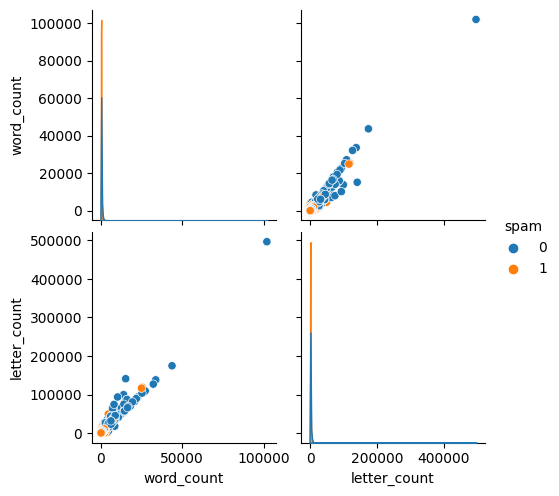

In [9]:
# Sử dụng biểu đồ trong thư viện Seaborn để kiểm tra mối quan hệ giữa các cặp biến 
sns.pairplot(df, hue='spam')

In [11]:
import nltk
from nltk.corpus import stopwords

In [12]:
# Tải tập stopwords
# Stop words là các từ phổ biến như "and", "the", "in", "at" trong ngôn ngữ tự nhiên mà thường không mang nhiều ý nghĩa khi xử lý văn bản (như trong việc phân tích cú pháp hoặc tìm kiếm thông tin). Chúng thường được loại bỏ hoặc bị bỏ qua trong các tác vụ xử lý ngôn ngữ tự nhiên để tập trung vào các từ khác quan trọng hơn.
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [13]:
# creating a set of all stop words from the downloaded word dictonary.
stop_words = set(stopwords.words('english'))

In [14]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [1]:
# punk dùng để phân tách các từ trong câu
nltk.download('punkt') 

NameError: name 'nltk' is not defined

In [16]:
st = "creating a set of all stop words from the downloaded word dictonary."

In [17]:
# Tách các từ trong câu mẫu ra
n_st = nltk.word_tokenize(st)

In [19]:
n_st

['creating',
 'a',
 'set',
 'of',
 'all',
 'stop',
 'words',
 'from',
 'the',
 'downloaded',
 'word',
 'dictonary',
 '.']

In [18]:
# tạo 1 mảng để lưu các từ của câu mẫu mà không nằm trong tập stopwords
clean = [word for word in n_st if word.lower() not in stop_words]

In [20]:
clean

['creating', 'set', 'stop', 'words', 'downloaded', 'word', 'dictonary', '.']

In [21]:
# Tương tự ta loại bỏ các stopwords trong từng câu của tập dataset
df['message'] = df['message'].apply(lambda x : ' '.join([word for word in x.split() if word not in stop_words]))

In [22]:
import re

In [23]:
# Loại bỏ ký tự không cần thiết từ cột 'message'
df['message'] = df['message'].apply(lambda x: re.sub("[^'.,a-z0-9 ]+", " ", x))

In [24]:
# Chuẩn hoá các từ về dạng cơ bản của chúng để làm giảm độ phức tạp khi xử lý

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
lem = WordNetLemmatizer()

In [29]:
# Ví dụ chuyển từ buy ở các thì khác nhau về dạng cơ bản ở hiện tại đơn
[lem.lemmatize(i, pos='v') for i in ['buy', 'bought', 'buying']]

['buy', 'buy', 'buy']

In [30]:
df['message']

0        ounce feather bowl hummingbird opec moment ala...
1        wulvob get medircations online qnb ikud viagra...
2        computer connection cnn com wednesday escapenu...
3        university degree obtain prosperous future mon...
4        thanks answers guys know checked rsync manual ...
                               ...                        
83443    hi given date get last date month data form yy...
83444    order software cd download site immediately de...
83445    dear valued member canadianpharmacy provides w...
83446    subscribe change profile contact us long term ...
83447    get life   viagra helped millions men   good c...
Name: message, Length: 83448, dtype: object

In [31]:
# Áp dụng chuẩn hoá các từ về dạng cơ bản cho dataset
df['message'] = df['message'].apply(lambda x: ' '.join([lem.lemmatize(i, pos='v') for i in x.split()]))

In [32]:
df['message']

0        ounce feather bowl hummingbird opec moment ala...
1        wulvob get medircations online qnb ikud viagra...
2        computer connection cnn com wednesday escapenu...
3        university degree obtain prosperous future mon...
4        thank answer guy know check rsync manual would...
                               ...                        
83443    hi give date get last date month data form yyy...
83444    order software cd download site immediately de...
83445    dear value member canadianpharmacy provide wid...
83446    subscribe change profile contact us long term ...
83447    get life viagra help millions men good cause ,...
Name: message, Length: 83448, dtype: object

In [33]:
# Xác định các từ có tần suất xuất hiện nhiều nhất và ít nhất
term_frequency = pd.Series(''.join(df['message']).split()).value_counts()
most_freq_words = term_frequency.head(20)
least_freq_words = term_frequency[term_frequency <= 1]

In [34]:
most_freq_words = term_frequency.head(20)
least_freq_words = term_frequency[term_frequency <= 1]

In [35]:
most_freq_words

escapenumber    1139150
.                445736
,                334068
escapelong       224745
http              81182
'                 76798
com               66353
r                 60326
c                 56264
enron             52586
use               44731
get               42438
say               40514
list              40400
org               39983
mail              39771
please            39764
help              39603
x                 39297
www               38012
Name: count, dtype: int64

In [36]:
least_freq_words

rebekka                    1
escapenumberapplication    1
ekap                       1
wohlfarth                  1
825854664                  1
                          ..
augustalouise              1
davetuesday                1
statementautomatic         1
einrxyfjozpvthink          1
childssubscribe            1
Name: count, Length: 191772, dtype: int64

In [37]:
# Loại bỏ các từ xuất hiện nhiều nhất và ít nhất trong các câu trong dataset
df['message'] = df['message'].apply(lambda x : ' '.join([word for word in x.split() if word not in most_freq_words]))
df['message'] = df['message'].apply(lambda x : ' '.join([word for word in x.split() if word not in least_freq_words]))

In [38]:
df['message']

0        ounce feather bowl hummingbird opec moment ala...
1        wulvob medircations online viagra levitra cial...
2        computer connection cnn wednesday may pm edt r...
3        university degree obtain prosperous future mon...
4        thank answer guy know check rsync manual would...
                               ...                        
83443    hi give date last date month data form yyyymm ...
83444    order software cd download site immediately de...
83445    dear value member canadianpharmacy provide wid...
83446    subscribe change profile contact us long term ...
83447    life viagra millions men good cause wrongdoing...
Name: message, Length: 83448, dtype: object

In [39]:
df

,spam,message,word_count,letter_count
0,1,ounce feather bowl hummingbird opec moment ala...,20,129
1,1,wulvob medircations online viagra levitra cial...,103,705
2,0,computer connection cnn wednesday may pm edt r...,339,1896
3,1,university degree obtain prosperous future mon...,77,516
4,0,thank answer guy know check rsync manual would...,223,1108
...,...,...,...,...
83443,0,hi give date last date month data form yyyymm ...,342,2245
83444,1,order software cd download site immediately de...,108,462
83445,1,dear value member canadianpharmacy provide wid...,76,459
83446,0,subscribe change profile contact us long term ...,277,1837


In [46]:
# Bỏ các cột không cần thiết để build model
df.drop(['word_count', 'letter_count'], axis=1, inplace=True)

KeyError: "['word_count', 'letter_count'] not found in axis"

In [45]:
# Đổi vị trí 2 cột message và spam

df['spam'], df['message'] = df['message'], df['spam']
df.columns = ['message', 'spam']

KeyError: 'spam'

In [42]:
df.head()

,message,spam
0,ounce feather bowl hummingbird opec moment ala...,1
1,wulvob medircations online viagra levitra cial...,1
2,computer connection cnn wednesday may pm edt r...,0
3,university degree obtain prosperous future mon...,1
4,thank answer guy know check rsync manual would...,0


In [43]:
# sử dụng hàm get_dummies từ pandas để chuyển đổi cột 'spam' thành dạng số (0 và 1) sử dụng one-hot encoding.
# drop_first=True để tránh việc tạo ra các cột có thể dự đoán được từ các cột khác.
df = pd.get_dummies(data=df, columns=['spam'], drop_first=True, prefix="", prefix_sep="")

In [44]:
# Chia tập dữ liệu thành 2 tập huấn luyện và kiểm tra
from sklearn.model_selection import train_test_split
x = df['message']
y = df['spam']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

KeyError: 'spam'

In [279]:
# chuyển đổi dữ liệu văn bản từ tập huấn luyện và tập kiểm tra thành ma trận số, trong đó mỗi hàng là một tin nhắn và mỗi cột là một từ, và giá trị trong ma trận là số lần từ đó xuất hiện trong tin nhắn tương ứng. Ma trận này được sử dụng làm đầu vào cho mô hình SVM.
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x_train_cv = cv.fit_transform(x_train)
x_test_cv = cv.transform(x_test)

In [303]:
x_train_cv

<3900x3963 sparse matrix of type '<class 'numpy.int64'>'
	with 27432 stored elements in Compressed Sparse Row format>

In [304]:
x_test_cv

<1672x3963 sparse matrix of type '<class 'numpy.int64'>'
	with 11290 stored elements in Compressed Sparse Row format>

In [305]:
# creating an ml model using using support vector machine
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
svm = LinearSVC()
svm.fit(x_train_cv, y_train)

In [306]:
svm = LinearSVC()
svm.fit(x_train_cv, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [307]:
y_pred = svm.predict(x_test_cv)

In [308]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [312]:
# tạo một báo cáo phân loại chi tiết, so sánh giữa nhãn thực tế y_test và nhãn dự đoán y_pred. Báo cáo này bao gồm các chỉ số như accuracy, precision, recall và F1-score.
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.976415,0.978723,0.976675,0.977569,0.976717
recall,0.997247,0.840183,0.976675,0.918715,0.976675
f1-score,0.986721,0.904177,0.976675,0.945449,0.975909
support,1453.000000,219.000000,0.976675,1672.000000,1672.000000


Text(0.5, 1.0, 'Confussion Matrix')

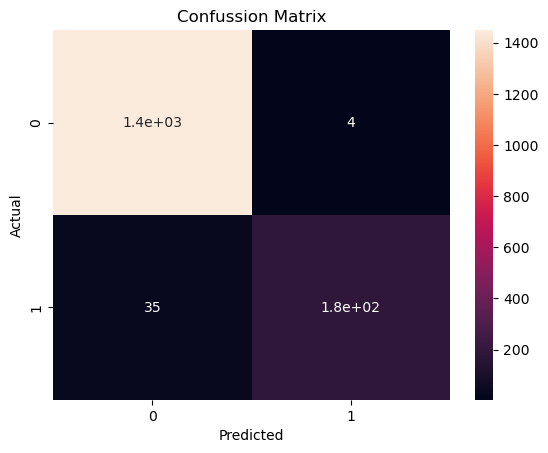

In [316]:
# Vẽ biểu đồ thể hiện tương quan giữa nhãn dự đoán và nhãn thực tế
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confussion Matrix')

In [317]:
# Stroing the model
import pickle
import os


In [318]:
# lưu mô hình và CountVectorizer đã được huấn luyện vào ổ đĩa
# Tạo thư mục 'spam_nlp' nếu chưa tồn tại
os.makedirs('spam_nlp', exist_ok=True)

In [319]:
# Lưu CountVectorizer
pickle.dump(cv, open('spam_nlp/cv.pkl', 'wb'))
# Lưu mô hình SVM
pickle.dump(svm, open('spam_nlp/svm.pkl', 'wb'))

In [322]:
# Tải mô hình và CountVectorizer từ file đã lưu
cv_input = pickle.load(open('spam_nlp/cv.pkl', 'rb'))
svm_input = pickle.load(open('spam_nlp/svm.pkl', 'rb'))

In [330]:
# Sử dụng mô hình và CountVectorizer đã tải để dự đoán
text = '2nd try contact u. 750 pound prize. claim easy, 10p per minute. bt national rate.'
text = cv_input.transform([text])

svm_input.predict(text)

array([1], dtype=uint8)

### So here as you can see the output here predicted is as '1' with means spam